In [55]:
from __future__ import print_function
import numpy as np
import glob
import pandas as pd
from random import shuffle


import tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.callbacks import EarlyStopping
%matplotlib inline
import matplotlib.pyplot as plt

#from keras.preprocessing.image import ImageDataGenerator

import cv2
WIDTH  = 64
HEIGHT = 64


batch_size = 16
num_classes = 3
epochs = 20

np.random.seed(13)
print( tensorflow.__version__,keras.__version__)

1.3.0 2.0.8


In [39]:
def build_train_set():
    
    
    images =  glob.glob("/disk/projects/selfdriving/shared/img4/*.jpg") 
    dataset = []
    for file in images:
        
        label = int( file.split("_")[-1].split(".")[0] )
        if label==4:
            continue
        #print(label)
        img = cv2.imread(file)
        
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize( img, (WIDTH, HEIGHT))
        
        
        ## flip image for data augmentation
        img2 = cv2.flip( img.copy(), 1 )
        #plt.imshow(img2)
        
            
        dataset.append( (np.array(img), label))
        dataset.append( (np.array(img2), label))

    shuffle(dataset)
        
    return np.array(dataset)

In [34]:
dataset = build_train_set()

len(dataset)

1010

In [40]:
r = np.random.rand( dataset.shape[0])
train = dataset[r<.8]
test = dataset[r>=.8]

In [41]:
train.shape, test.shape
x_train = np.array([ img for img in train[:,0]])
y_train = train[:,1]

x_test = np.array([ img for img in test[:,0]])
y_test = test[:,1]

 


In [42]:
# input image dimensions
img_rows, img_cols = WIDTH, HEIGHT


if K.image_data_format() == 'channels_first':
    input_shape = (3, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 3)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, mode='auto')


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test),
          callbacks =[es]
         )
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (811, 64, 64, 3)
811 train samples
199 test samples
Train on 811 samples, validate on 199 samples
Epoch 1/20
811/811 [==============================] - 4s - loss: 0.8811 - acc: 0.6831 - val_loss: 0.7394 - val_acc: 0.6784
Epoch 2/20
811/811 [==============================] - 3s - loss: 0.6167 - acc: 0.7324 - val_loss: 1.0441 - val_acc: 0.6884
Epoch 3/20
811/811 [==============================] - 3s - loss: 0.4513 - acc: 0.8076 - val_loss: 0.3622 - val_acc: 0.8342
Epoch 4/20
811/811 [==============================] - 3s - loss: 0.2709 - acc: 0.8866 - val_loss: 0.3443 - val_acc: 0.8643
Epoch 5/20
811/811 [==============================] - 3s - loss: 0.2045 - acc: 0.9236 - val_loss: 0.1702 - val_acc: 0.9497
Epoch 6/20
811/811 [==============================] - 3s - loss: 0.1268 - acc: 0.9556 - val_loss: 0.1614 - val_acc: 0.9347
Epoch 7/20
811/811 [==============================] - 3s - loss: 0.1274 - acc: 0.9507 - val_loss: 0.1045 - val_acc: 0.9598
Epoch 8/20
811/811 [======

In [43]:
model.save("/disk/projects/selfdriving/shared/model/model_3.hd5")

In [20]:
ret = model.predict( x_train[8].reshape( 1, 64,64,3) )

In [21]:
ret

array([[ 0.04502429,  0.07431913,  0.8806566 ]], dtype=float32)

In [22]:
np.argmax(ret)

2

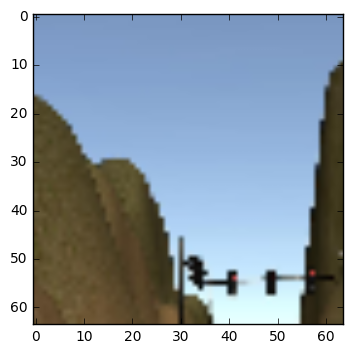

In [46]:
plt.imshow( x_train[3])

In [50]:
del model

from keras.models import load_model
model = load_model("/disk/projects/selfdriving/shared/model/model_3.hd5")

In [51]:
ret = model.predict( x_train[8].reshape( 1, 64,64,3) )

In [52]:
ret


array([[  9.99998927e-01,   1.05010054e-06,   1.74752901e-09]], dtype=float32)